# CIAL Meeting

## Transit Data

##  ADAS Modeling For Cutaway Bus

## Questions: 

### Any plan to purchase these systems to retrofiting buses

### If yes, what are Original Equipment Manufacturers (OEM)? 

### Is there any requirements for safety performance tests? 

### Is there any plan for driver training?





In [1]:
import pandas as pd
import scipy as sc
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import seaborn as sb 
import collections as cl
from IPython.core.display import HTML
from IPython.display import Image
from matplotlib.pyplot import figure

#### Transit Database Overview (import/cleaning)

In [2]:
#read database
# terms can be found in https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary#G
pd.set_option('display.max_columns', 100)
Data='E:/2021/IDEA/Transit data/Major_Safety_Events.csv'
Dt = pd.read_csv(Data, sep=',')
Dt.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,32,33,36,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,5 Digit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year,Incident Number,Incident Date,Incident Time,Event Type,Other Event Type Description,Safety/Security,Collision With,Property Damage,Total Injuries,Total Fatalities,Life Safety (Y/N),Number of Transit Vehicles Involved,Towed (Y/N),Number of Vehicles Involved,Location Type,Incident Location,Evacuation Comment,Self Evacuation (Y/N),Evacuation Location,HazMat Type,HazMat Type Description,Fire Type,Fire Fuel,Other Fire Fuel Description,Weather,Lighting,Current Condition,Tide,Road Configuration,Track Configuration,Path Condition,Rail Alignment,Rail Grade Crossing Control,Right of Way Condition,Intersection,Intentional (Y/N),Vehicle Action,Action Type,Derailment Type,Transit (Y/N),Fuel Type,Vehicle Speed,Non-Rail Transit Vehicle Type,Manufacturer,Manufacturer Description,Transit Vehicle Rider Fatalities,People Waiting or Leaving Fatalities,Transit Vehicle Operator Fatalities,Transit Employee Fatalities,Other Worker Fatalities,Pedestrian or Bicyclist Fatalities,Pedestrian in Crosswalk Fatalities,Pedestrian Not in Crosswalk Fatalities,Pedestrian Crossing Tracks Fatalities,Pedestrian Walking Along Tracks Fatalities,Occupant of Other Vehicle Fatalities,Other Fatalities,Suicide Fatalities,Transit Vehicle Rider Injuries,People Waiting or Leaveing Injuries,Transit Vehicle Operator Injuries,Transit Employee Injuries,Other Worker Injuries,Pedestrian or Bicyclist Injuries,Pederstiran in Crosswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Occupant of Other Vehicle Injuries,Other Injuries,Suicide Injuries
0,50157.0,5157,Butler County Regional Transit Authority,Independent Public Agency or Authority of Tran...,CB,DO,30,"Cincinnati, OH-KY-IN",788,"1,624,827",53,"332,807","2,014",1,2/5/2014 0:00,11:15:45,Non-Rail Collision,NaN,SFT,Motor Vehicle,"50,000",2,0,NaN,1,NaN,1,Roadway: not a grade crossing or intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy,Daylight,NaN,NaN,Street,NaN,Snow / slush,NaN,NaN,Snow / slush,NaN,NaN,Going Straight,Head-On,NaN,"Y,N",Diesel,45,Transit: bus,Thomas Built Buses,Thomas-Dennis SLF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,50157.0,5157,Butler County Regional Transit Authority,Independent Public Agency or Authority of Tran...,DR,DO,30,"Cincinnati, OH-KY-IN",788,"1,624,827",53,"332,807","2,014",2,1/17/2014 0:00,9:40:56,Non-Rail Collision,NaN,SFT,Motor Vehicle,"2,000",1,0,NaN,1,NaN,1,Roadway: intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy,Daylight,NaN,NaN,Intersection or grade crossing,NaN,Dry,NaN,Not applicable,Dry,Trafic Signal,NaN,Stopped,Rear-ended,NaN,"Y,N",Gasoline,0,Transit: bus - cutaway,ElDorado National (formerly El Dorado/EBC/Nat....,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,40130.0,4130,Macon-Bibb County Transit Authority,Independent Public Agency or Authority of Tran...,MB,DO,234,"Macon, GA",98,"137,570",70,"155,547","2,014",1,1/21/2014 0:00,6:52:34,Non-Rail Collision,NaN,SFT,Person,"5,499",0,1,NaN,1,NaN,0,Roadway: intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Twilight,NaN,NaN,Intersection or grade crossing,NaN,Dry,NaN,Not applicable,Dry,No control device / indivisual / sign,NaN,Going Straight,Head-On,NaN,Y,Diesel,30,Transit: bus - cutaway,Goshen Coach,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20137.0,2137,Monroe Bus Corporation,Private-For-Profit Corporation,CB,DO,89,"Poughkeepsie-Newburgh, NY-NJ",327,"423,566",265,"351,982","2,014",2,1/6/2014 0:00,7:20:47,Non-Rail Collision,NaN,SFT,Motor Vehicle,"60,000",28,0,NaN,1,NaN,1,Roadway: intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Raining,Daylight,NaN,NaN,Intersection or grade crossing,NaN,Wet,NaN,Not applicable,Wet,No control device / indivisual / sign,NaN,Going Straight,Other front impact,NaN,"Y,N",Diesel,20,Tra

Counter({'Motor Vehicle': 33725,
         'Person': 3373,
         'Transit vehicle': 349,
         'Fixed Object': 1158,
         'Motor Vehicle,Motor Vehicle': 13,
         'Other': 93,
         'Fixed Object,Fixed Object': 1,
         'Animal': 43,
         'Motor Vehicle,Motor Vehicle,Motor Vehicle': 1,
         'Motor Vehicle,Person': 2,
         'Person,Person': 2,
         'Person,Motor Vehicle': 1,
         'Transit vehicle,Transit vehicle': 1})

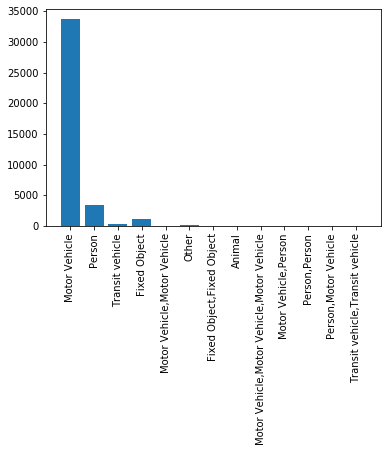

In [239]:
Dt.dropna(subset = ["Collision With"], inplace=True)

C_W=cl.Counter(Dt['Collision With'])


plt.bar(C_W.keys(), C_W.values())
plt.xticks(rotation=90)
C_W

(59412, 84)
Counter({'Non-Rail Collision': 38884, 'Assault': 7458, 'Rail Collision': 6387, 'Other': 3003, 'Suicide': 1067, 'Robbery': 917, 'Non Rail Fire': 456, 'Main Line Derailment': 339, 'Suspicious package': 166, 'Rail Fire': 154, 'Derailment': 137, 'Homicide': 122, 'Bomb Threat': 103, 'Rape': 77, 'Vandalism': 31, 'Larceny / Theft': 14, 'Ferry Boat Collision': 13, 'Flood': 11, 'Chemical / Biological / Nuclear / Radiological': 10, 'Arson': 10, 'Motor Vehicle Theft': 10, 'Non-Rail Hazardous Material Spill': 8, 'Lightning': 7, 'Other High Winds': 6, 'Hijacking': 6, 'Burglary': 5, 'Tornado': 3, 'Snow Storm': 2, 'Ferry Boat Fire': 2, 'Bombing': 1, 'Earthquake': 1, 'Hurricane': 1, 'Cyber': 1})


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text xticklabel objects>)

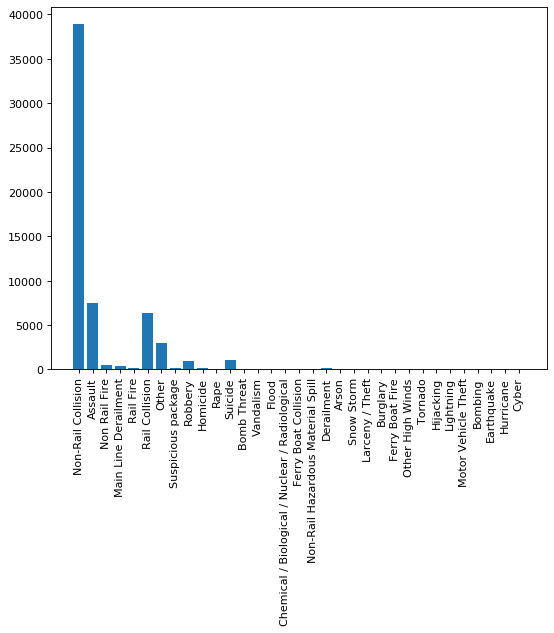

In [161]:
# sort data based on major event
print(Dt.shape)
Dt=pd.DataFrame(Dt)
OV=cl.Counter(Dt['Event Type'])
print(OV)
figure(figsize=(8, 6), dpi=80)
plt.bar(OV.keys(), OV.values())
plt.xticks(rotation=90)




### Pedestrian Data 

#### Location of accidents

(3373, 84)
Counter({0: 3125, 1: 247, 2: 1})
Counter({'Intersection or grade crossing': 1566, 'Street': 1566, 'Private property': 174, 'Divided highway': 37, 'Limited access highway': 10, 'Bridge': 8, 'Other': 8, 'Ramp': 2, 'Street,Bridge': 1, 'Tunnel': 1})
Counter({'Roadway: intersection': 1517, 'Revenue facility: transit station': 1201, 'Roadway: not a grade crossing or intersection': 1184, 'Bus Stop': 504, 'Right-of-way: grade crossing': 483, 'Right-of-way: not a grade crossing': 427, 'Revenue facility: terminal center': 119, 'Non-revenue facility': 26, 'Other': 20, 'Roadway: grade crossing': 8})


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

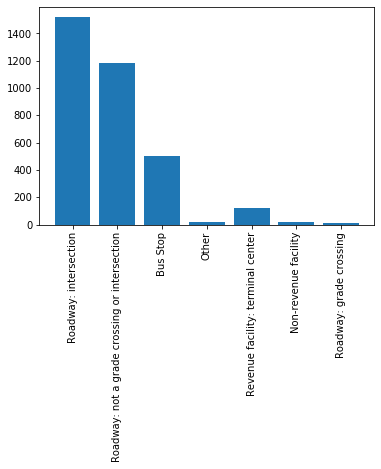

In [332]:
#pedestrian data for transit buses
#analysis of location of accidents

Dt=Dt.loc[Dt['Event Type']== 'Non-Rail Collision']
Dt=pd.DataFrame(Dt)          
ped_Dt=Dt.loc[Dt['Collision With']== 'Person'] 
ped_Dt=pd.DataFrame(ped_Dt)
a=ped_Dt['Road Configuration']
a2=ped_Dt['Location Type']
Fatal_Acc=cl.Counter(ped_Dt['Total Fatalities'])
print(ped_Dt.shape)
print(Fatal_Acc)


Rd=cl.Counter(a)
Rd_2=cl.Counter(a2)
print(Rd)
print(Rd2)
plt.bar(Rd_2.keys(), Rd_2.values())
plt.xticks(rotation=90)



In [147]:
Rd_3 = pd.DataFrame.from_dict(Rd_2, orient='index').reset_index()
Rd_3 = Rd_3.rename(columns={'index':'Road Location', 0:'Freq'})
Rd_3=Rd_3.sort_values(by=['Freq'], ascending=False)

Rd_3
#Non-Revenue Facility
#A facility or an area that is not used to enable individuals to board or alight transit vehicles, 
#and that is primarily staffed by transit employees. 

,Road Location,Freq
0,Roadway: intersection,1517
1,Roadway: not a grade crossing or intersection,1184
2,Bus Stop,504
4,Revenue facility: terminal center,119
5,Non-revenue facility,22
3,Other,19
6,Roadway: grade crossing,8


In [354]:
#revenue facility
Image(url= "https://img.masstransitmag.com/files/base/cygnus/mass/image/2021/02/16x9/Mark_Groce__MTA_New_York_City_Transit_QueensBus.602b1e5a76057.png?auto=format&fit=max&w=1200")

In [152]:
#vehicle type 

pd.set_option('display.max_rows', 100)
B_Type=ped_Dt['Non-Rail Transit Vehicle Type']
B_M=cl.Counter(B_Type)
B_M = pd.DataFrame.from_dict(B_M, orient='index').reset_index()
B_M = B_M.rename(columns={'index':'Bus Type', 0:'Freq'})
B_M=B_M.sort_values(by=['Freq'], ascending=False)
B_M

,Bus Type,Freq
1,Transit: bus,2578
2,Transit: bus - articulated,322
7,Transit: over-the-road bus/coach,121
4,Transit: demand response vehicle,116
13,Transit demand response vehicle,94
0,Transit: bus - cutaway,50
3,Transit: trolleybus,43
10,NaN,8
9,Transit: jitney or publico vehicle,8
11,Transit vehicle: taxi,7


#### Road Condition and Lightning

Percentage of pedestrian accidents in Dry path  8.734277689583587
Percentage of pedestrian accidents in raining path  8.523819696646017
Percentage of pedestrian accidents in snowing/sleeting weather  6.155778894472362
Percentage of pedestrian accidents in Icy path  1.1441647597254003
Percentage of pedestrian accidents in cloudy weather  9.753258845437616
Percentage of pedestrian accidents in daylight condition  7.48331423178049
Percentage of pedestrian accidents in dark condition  12.404758722095977
Percentage of pedestrian accidents in twilight condition  10.359408033826638
Percentage of pedestrian accidents when sun is in driver's eyes  21.21212121212121


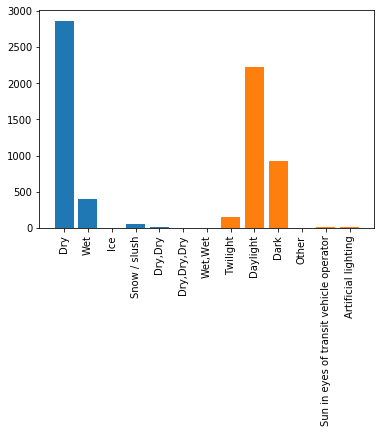

In [356]:
#Road and lightening condition
Wth_Con=cl.Counter(ped_Dt['Path Condition'])
Ligh_Con=cl.Counter(ped_Dt['Lighting'])

plt.bar(Wth_Con.keys(), Wth_Con.values())
plt.xticks(rotation=90)

plt.bar(Ligh_Con.keys(), Ligh_Con.values())
plt.xticks(rotation=90)

#Dry weather percentage
W_a=len(Dt.loc[Dt['Path Condition']=='Dry'])
W_P=len(ped_Dt.loc[ped_Dt['Path Condition']=='Dry'])
print("Percentage of pedestrian accidents in Dry path ", (W_P/W_a)*100)

#Wet weather percentage
M_1=len(Dt.loc[Dt['Path Condition']=='Wet'])
T_1=len(ped_Dt.loc[ped_Dt['Path Condition']=='Wet'])

print("Percentage of pedestrian accidents in raining path ", (T_1/M_1)*100)


#Snowy weather percentage
M_2=len(Dt.loc[Dt['Path Condition']=='Snow / slush'])
T_2=len(ped_Dt.loc[ped_Dt['Path Condition']=='Snow / slush'])

print("Percentage of pedestrian accidents in snowing/sleeting weather ", (T_2/M_2)*100)


#Icy weather percentage
M_3=len(Dt.loc[Dt['Path Condition']=='Ice'])
T_3=len(ped_Dt.loc[ped_Dt['Path Condition']=='Ice'])

print("Percentage of pedestrian accidents in Icy path ", (T_3/M_3)*100)


#Cloudy weather percentage
M_4=len(Dt.loc[Dt['Weather']=='Cloudy'])
T_4=len(ped_Dt.loc[ped_Dt['Weather']=='Cloudy'])

print("Percentage of pedestrian accidents in cloudy weather ", (T_4/M_4)*100)

#we could say that during the snow the number of pedestrians is lower than other weather conditions

#lighting condition
#
##

#Daylight weather percentage
SS1=len(Dt.loc[Dt['Lighting']=='Daylight'])
FF1=len(ped_Dt.loc[ped_Dt['Lighting']=='Daylight'])
print("Percentage of pedestrian accidents in daylight condition ", (FF1/SS1)*100)

#Dark weather percentage
SS2=len(Dt.loc[Dt['Lighting']=='Dark'])
FF2=len(ped_Dt.loc[ped_Dt['Lighting']=='Dark'])
print("Percentage of pedestrian accidents in dark condition ", (FF2/SS2)*100)

#twilight weather percentage
SS3=len(Dt.loc[Dt['Lighting']=='Twilight'])
FF3=len(ped_Dt.loc[ped_Dt['Lighting']=='Twilight'])
print("Percentage of pedestrian accidents in twilight condition ", (FF3/SS3)*100)


#twilight weather percentage
SS4=len(Dt.loc[Dt['Lighting']=='Sun in eyes of transit vehicle operator'])
FF4=len(ped_Dt.loc[ped_Dt['Lighting']=='Sun in eyes of transit vehicle operator'])
print("Percentage of pedestrian accidents when sun is in driver's eyes ", (FF4/SS4)*100)







([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

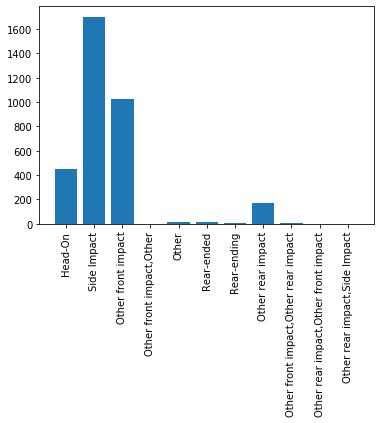

In [235]:
#crash type with pedestrian
ped_Dt.dropna(subset = ["Action Type"], inplace=True)

C_TYP=cl.Counter(ped_Dt['Action Type'])


plt.bar(C_TYP.keys(), C_TYP.values())
plt.xticks(rotation=90)


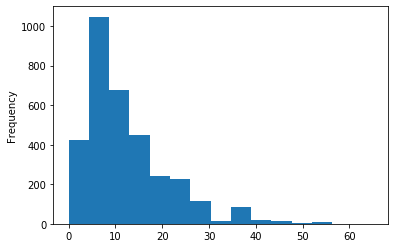

In [361]:
#crash speed with pedestrian

ped_Dt.dropna(subset = ["Vehicle Speed"], inplace=True)
#ped_Dt.loc[:,'Vehicle Speed']
#ped_Dt=ped_Dt.drop(ped_Dt.index[[70,1669,2443,2481,3327]])

ped_Dt["Vehicle Speed"] = pd.to_numeric(ped_Dt["Vehicle Speed"])


ped_Dt["Vehicle Speed"]

ped_Dt['Vehicle Speed'].plot.hist(bins=15)



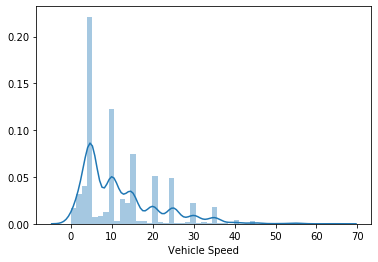

In [358]:
sb.distplot(ped_Dt["Vehicle Speed"])

In [316]:
ped_Dt["Vehicle Speed"].to_excel('saved_file.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Counter({'Head-On': 2421,
         'Rear-ended': 9093,
         'Other front impact': 6374,
         'Side Impact': 9880,
         'Other': 30,
         'Rear-ending': 2598,
         'Sideswipe': 2196,
         'Side Impact,Side Impact': 9,
         'Rear-ended,Rear-ending,Rear-ended': 1,
         'Sideswipe,Sideswipe': 2,
         'Side Impact,Rear-ending': 2,
         'Other rear impact': 1072,
         'Rear-ending,Rear-ended': 2,
         'Other rear impact,Sideswipe': 1,
         'Roof/top of vehicle': 4,
         'Head-On,Head-On': 2,
         'Side Impact,Rear-ended': 3,
         'Rear-ended,Rear-ending': 2,
         'Head-On,Side Impact': 3,
         'Other front impact,Other front impact': 1,
         'Rear-ended,Rear-ended': 5,
         'Side Impact,Other front impact': 2,
         'Other front impact,Other rear impact': 2,
         'Sideswipe,Other rear impact': 1,
         'Other front impact,Side Impact': 1,
         'Rear-ended,Side Impact': 3,
         'Head-On,Other fro

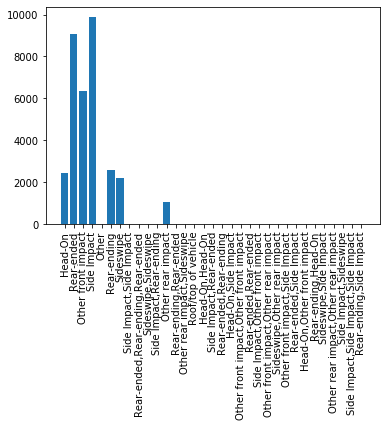

In [353]:
#Crash modes with other vehicles
Cr_V=Dt[Dt["Collision With"]=='Motor Vehicle']
Cr_V.dropna(subset = ["Action Type"], inplace=True)
Cr_V.head(10)
Cr_Vh=cl.Counter(Cr_V['Action Type'])


plt.bar(Cr_Vh.keys(), Cr_Vh.values())
plt.xticks(rotation=90)
Cr_Vh